In [8]:
# Summary of the data
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(data)


     Person ID  Gender  Age            Occupation  ...  Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder
0            1    Male   27     Software Engineer  ...          126/83          77         4200             NaN
1            2    Male   28                Doctor  ...          125/80          75        10000             NaN
2            3    Male   28                Doctor  ...          125/80          75        10000             NaN
3            4    Male   28  Sales Representative  ...          140/90          85         3000     Sleep Apnea
4            5    Male   28  Sales Representative  ...          140/90          85         3000     Sleep Apnea
..         ...     ...  ...                   ...  ...             ...         ...          ...             ...
369        370  Female   59                 Nurse  ...          140/95          68         7000     Sleep Apnea
370        371  Female   59                 Nurse  ...          140/95          68         7000     Slee

   Gender  Percentage
0    Male       50.53
1  Female       49.47


Text(0.5, 1.0, 'Gender Distribution')

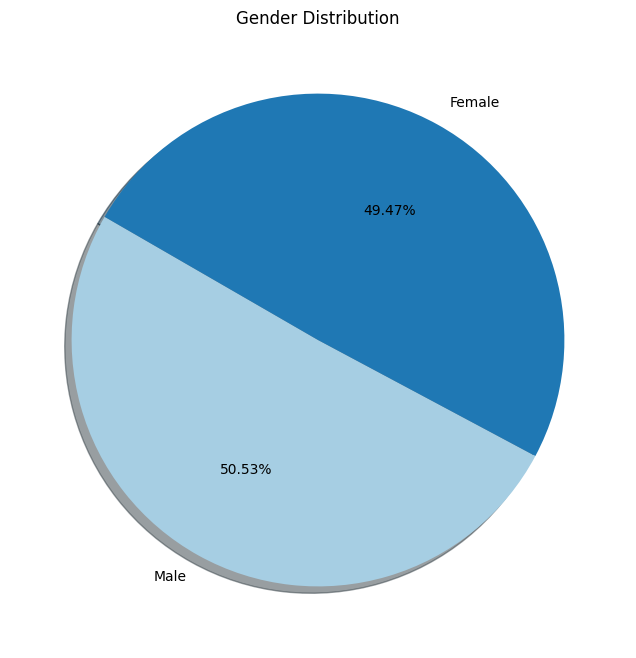

In [65]:
# Distribution between gender
gendercounts = data['Gender'].value_counts()

genderpercentages = ((gendercounts/ gendercounts.sum()) * 100).round(2)

table3 = genderpercentages.reset_index()
table3.columns = ['Gender', 'Percentage']

print(table3)

plt.figure(figsize=(8, 8))
plt.pie(table3['Percentage'], labels=table3['Gender'], autopct='%1.2f%%', startangle=150, colors=plt.cm.Paired.colors, shadow =True)
plt.title('Gender Distribution')

In [3]:
# Average Sleep Duration, Age, Daily steps, Heart rate by occupation.
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
table1 = data.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Age': 'mean',
    'Daily Steps':'mean',
    'Heart Rate':'mean'
}).reset_index()

table1['Average Sleep Duration'] = table1['Sleep Duration'].round(2)
table1['Average Age'] = table1['Age'].round(2)
table1['Average Daily Steps'] = table1['Daily Steps'].round(2)
table1['Average Heart Rate'] = table1['Heart Rate'].round(2)

table1 = table1.drop(columns=['Sleep Duration', 'Age','Daily Steps','Heart Rate'])

table1.columns = ['Occupation', 'Average Sleep Duration','Average Age','Average Daily Step', 'Average Heart Rate']

print(table1.to_string(index=False))

          Occupation  Average Sleep Duration  Average Age  Average Daily Step  Average Heart Rate
          Accountant                    7.11        39.62             6881.08               68.86
              Doctor                    6.97        32.68             6808.45               71.52
            Engineer                    7.99        46.59             5980.95               67.19
              Lawyer                    7.41        39.43             7661.70               69.64
             Manager                    6.90        45.00             5500.00               75.00
               Nurse                    7.06        51.79             8057.53               72.00
Sales Representative                    5.90        28.00             3000.00               85.00
         Salesperson                    6.40        43.53             6000.00               72.00
           Scientist                    6.00        33.50             5350.00               78.50
   Software Engineer

    BMI Category  Count
0         Normal    195
1     Overweight    148
2  Normal Weight     21
3          Obese     10


Text(0.5, 1.0, 'Distribution of BMI Categories')

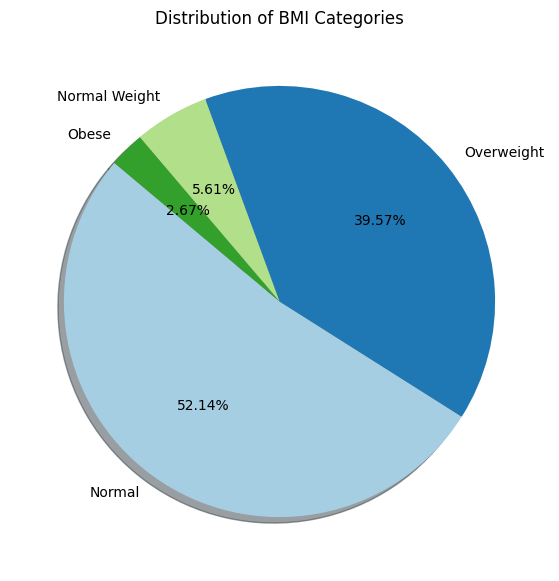

In [42]:
# General BMI category %

bmicounts = data['BMI Category'].value_counts().reset_index()
bmicounts.columns = ['BMI Category', 'Count']
print(bmicounts)

plt.figure(figsize=(10, 7))
plt.pie(bmicounts['Count'], labels=bmicounts['BMI Category'], autopct='%2.2f%%', startangle=140, colors=plt.cm.Paired.colors, shadow=True)
plt.title('Distribution of BMI Categories')

  Sleep Disorder  Count
0    No Disorder    219
1    Sleep Apnea     78
2       Insomnia     77


Text(0.5, 1.0, 'Distribution of Sleep Disorder')

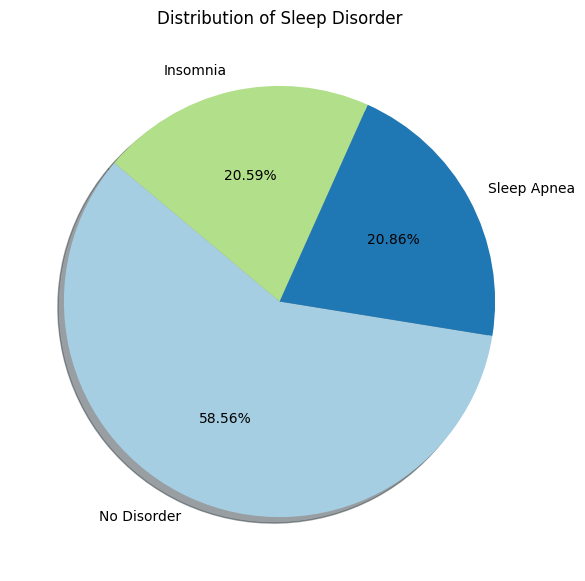

In [43]:
# General Sleep Disorder

data['Sleep Disorder'] = data['Sleep Disorder'].replace(['None', None], 'No Disorder')
sleepDisordercounts = data['Sleep Disorder'].value_counts().reset_index()
sleepDisordercounts.columns = ['Sleep Disorder', 'Count']

print(sleepDisordercounts)

plt.figure(figsize=(10, 7))
plt.pie(sleepDisordercounts['Count'], labels=sleepDisordercounts['Sleep Disorder'], autopct='%2.2f%%', startangle=140, colors=plt.cm.Paired.colors, shadow=True)
plt.title('Distribution of Sleep Disorder')

Text(0.5, 1.0, 'Distribution of BMI Categories (Female)')

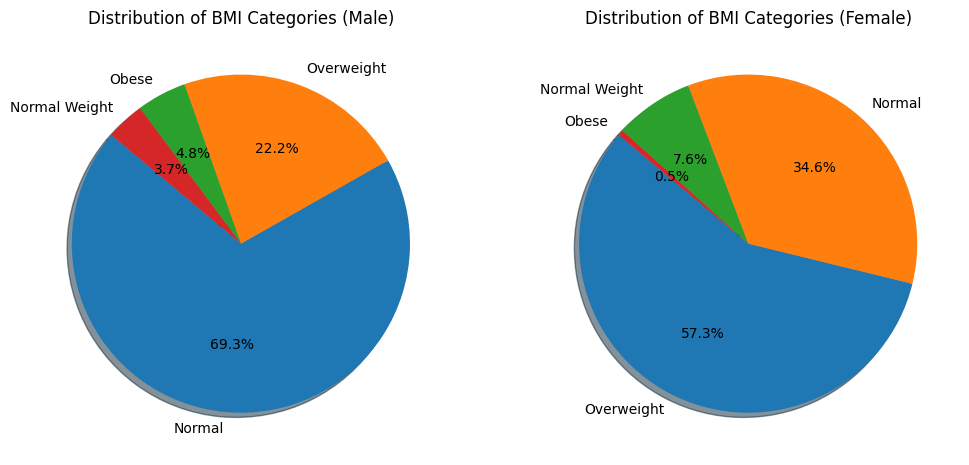

In [11]:
# General BMI category between genders
import matplotlib.pyplot as plt

maledata = data[data['Gender'] == 'Male']
femaledata = data[data['Gender'] == 'Female']

malebmicounts = male_data['BMI Category'].value_counts().reset_index()
malebmicounts.columns = ['BMI Category', 'Count']


femalebmicounts = female_data['BMI Category'].value_counts().reset_index()
femalebmicounts.columns = ['BMI Category', 'Count']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.pie(malebmicounts['Count'], labels=malebmicounts['BMI Category'], autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of BMI Categories (Male)')

plt.subplot(1, 2, 2)
plt.pie(femalebmicounts['Count'], labels=femalebmicounts['BMI Category'], autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of BMI Categories (Female)')



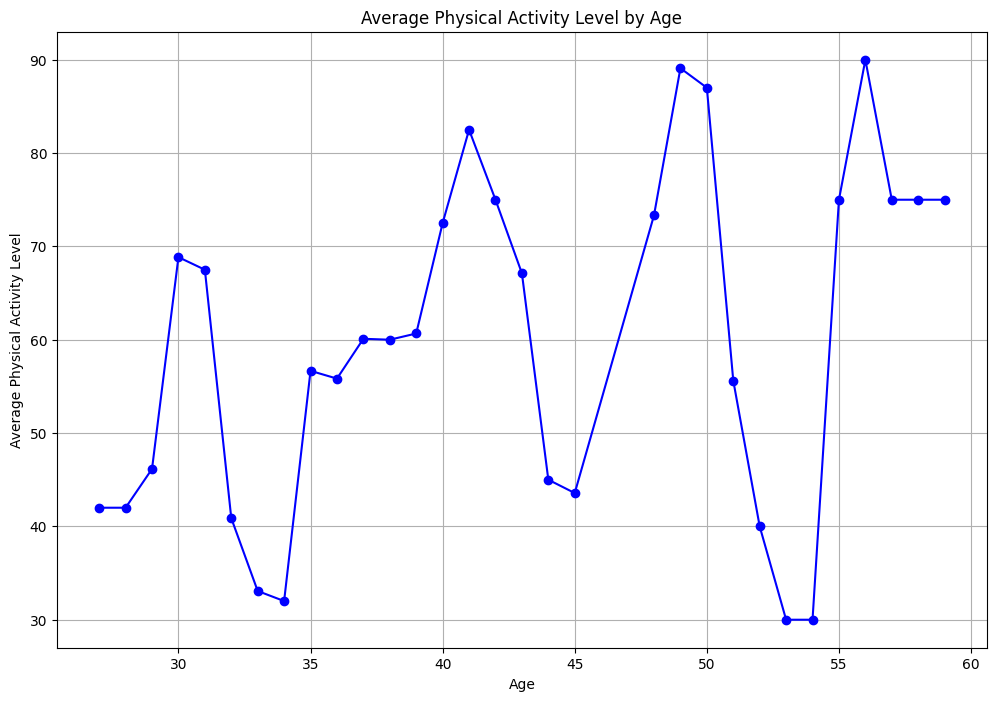

In [31]:
#Physical activity Level by Age 
age_activity = data.groupby('Age')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(age_activity['Age'], age_activity['Physical Activity Level'], marker='o', linestyle='-', color='b')

plt.xlabel('Age')
plt.ylabel('Average Physical Activity Level')
plt.title('Average Physical Activity Level by Age')
plt.grid(True)

Text(0.5, 1.0, 'Average Heart Rate by Age')

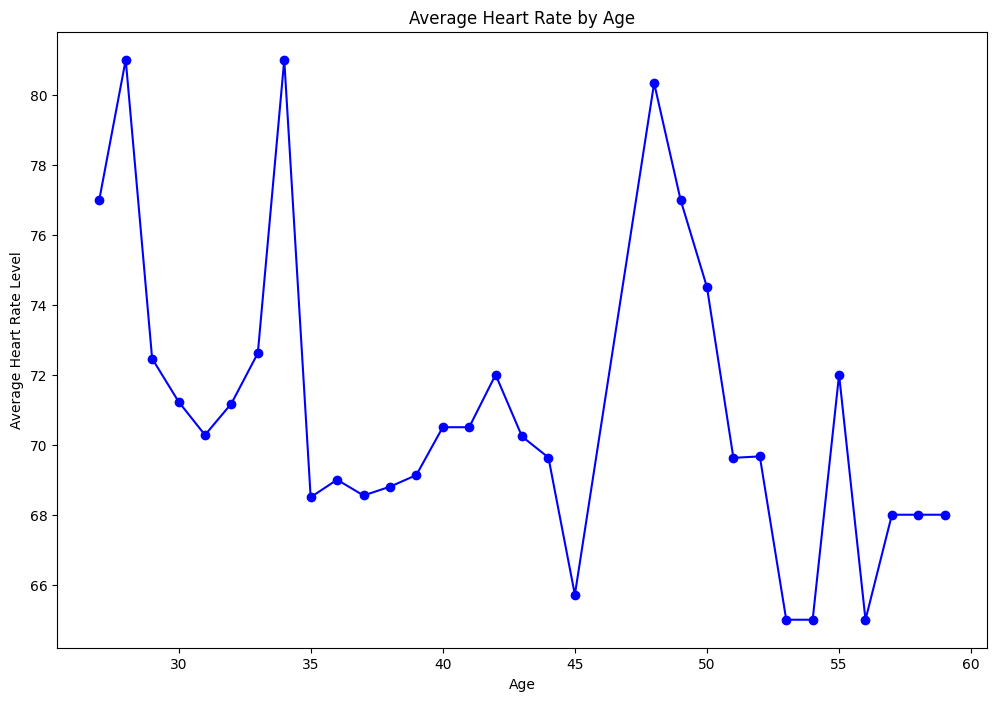

In [35]:
# Average of heart rate by Age 
agevsheartrate = data.groupby('Age')['Heart Rate'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(agevsheartrate['Age'], agevsheartrate['Heart Rate'], marker='o', linestyle='-', color='b')

plt.xlabel('Age')
plt.ylabel('Average Heart Rate Level')
plt.title('Average Heart Rate by Age')


Text(0.5, 1.0, 'Average Physical Activity Level by Age (Male vs Female)')

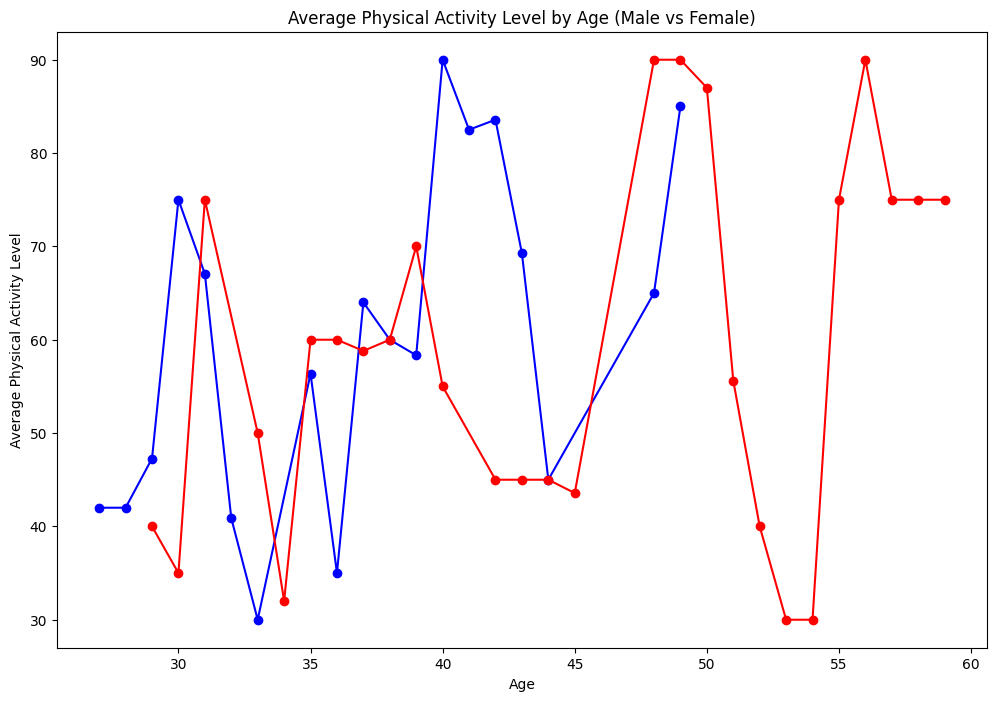

In [17]:
# Average Physical Activity Level by Age (Male vs Female)

averagemaleactivity = data[data['Gender'] == 'Male'].groupby('Age')['Physical Activity Level'].mean().reset_index()
averagefemaleactivity = data[data['Gender'] == 'Female'].groupby('Age')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(averagemaleactivity['Age'], averagemaleactivity['Physical Activity Level'], marker='o', linestyle='-', color='blue', label='Male Average')
plt.plot(averagefemaleactivity['Age'], averagefemaleactivity['Physical Activity Level'], marker='o', linestyle='-', color='red', label='Female Average')

plt.xlabel('Age')
plt.ylabel('Average Physical Activity Level')
plt.title('Average Physical Activity Level by Age (Male vs Female)')



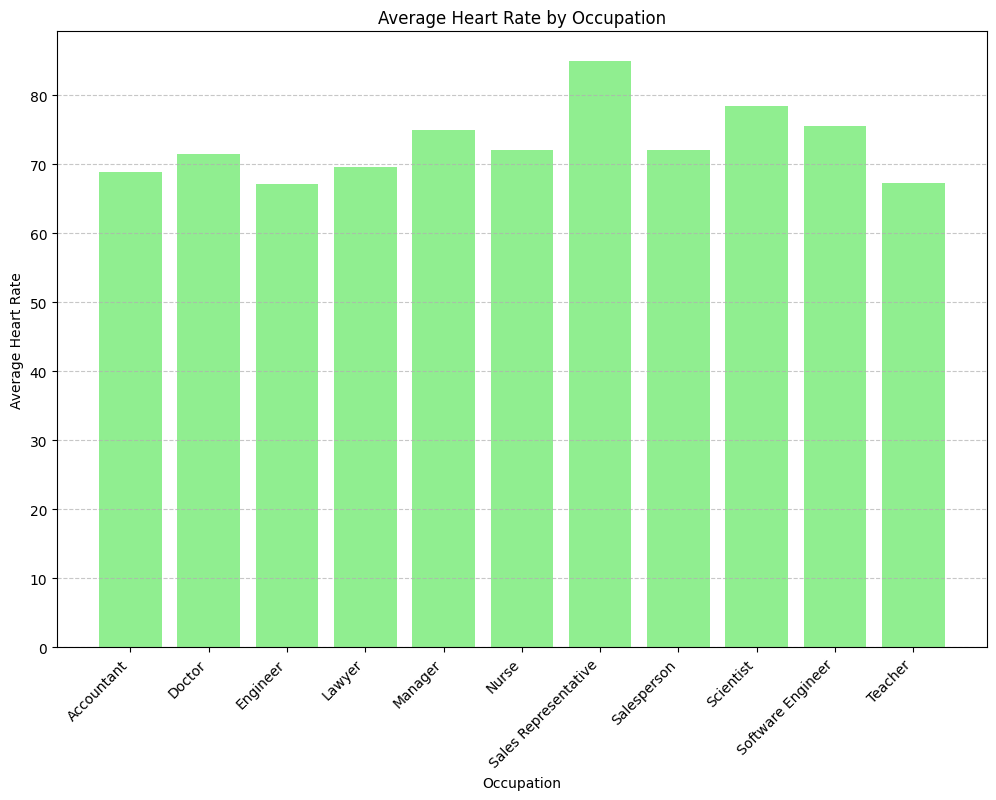

In [40]:
#Average Heart Rate by Occupation

occupationvsheartrate = data.groupby('Occupation')['Heart Rate'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(occupationvsheartrate['Occupation'], occupationvsheartrate['Heart Rate'], color='lightgreen')

plt.xlabel('Occupation')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Occupation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

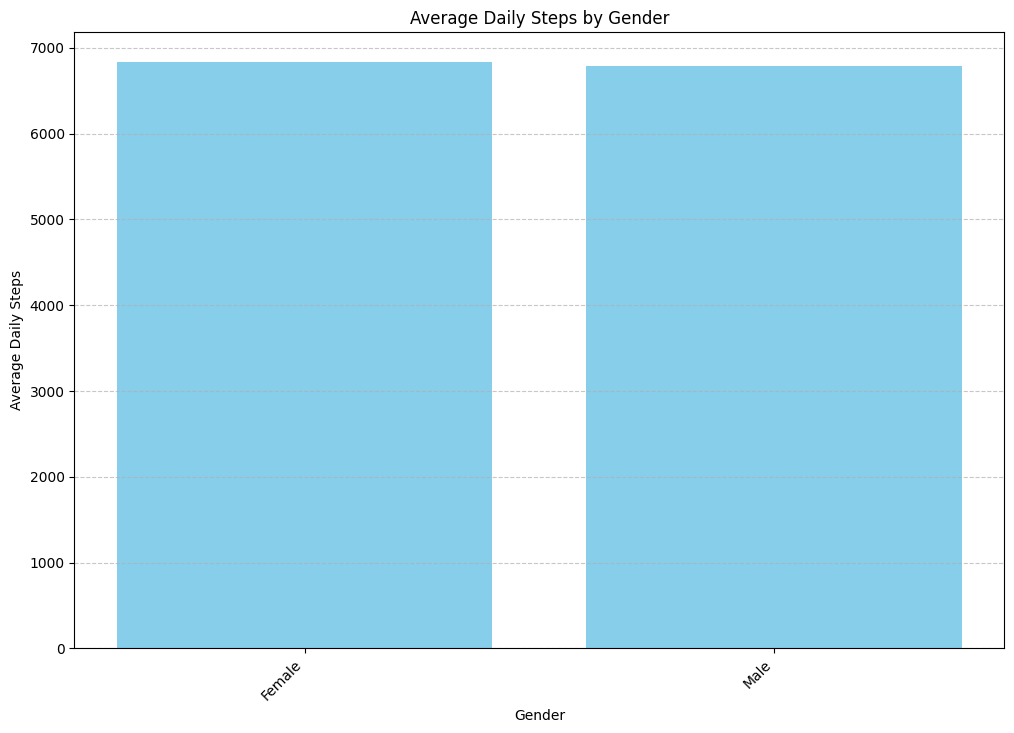

In [68]:
# Average Daily Steps by Gender
dailystepsbygender = data.groupby('Gender')['Daily Steps'].mean().reset_index()
plt.figure(figsize=(12, 8))

plt.bar(dailystepsbygender['Gender'], dailystepsbygender['Daily Steps'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Daily Steps')
plt.title('Average Daily Steps by Gender')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

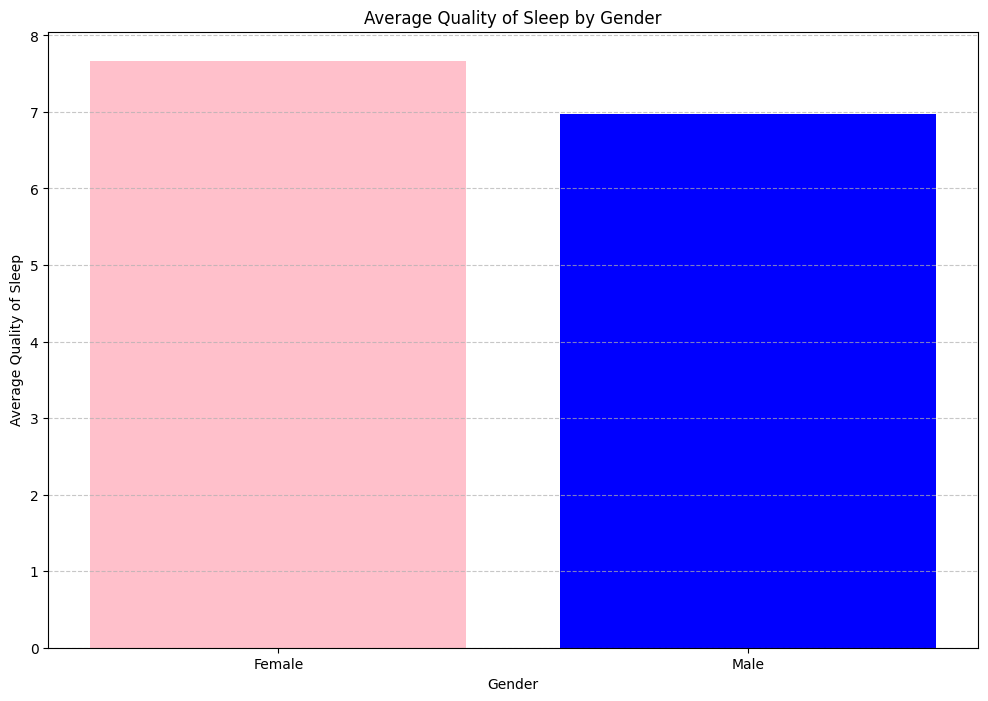

In [21]:
# Average Quality of Sleep by Gender
qualityofsleepbygender = data.groupby('Gender')['Quality of Sleep'].mean().reset_index()

colors = ['blue' if gender == 'Male' else 'pink' for gender in qualityofsleepbygender['Gender']]

plt.figure(figsize=(12, 8))
plt.bar(qualityofsleepbygender['Gender'], qualityofsleepbygender['Quality of Sleep'], color=colors)
plt.xlabel('Gender')
plt.ylabel('Average Quality of Sleep')
plt.title('Average Quality of Sleep by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)